In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import date
from datetime import datetime

%matplotlib inline

In [2]:
player_prof = pd.read_csv('../data/player-profiles.csv')
player_prof.head(2)

,Unnamed: 0,Event Name,Month,Year,EventRating,Place,Strokes,Cash,State,Country,Division,Tier,Tour,Event Date,Player Name
0,0,(DGPT Silver) The New World Championship prese...,Nov,2022,1029.0,6,181,900.0,Florida,USA,MPO,A,DGPT-Silver,2022-11-11,Ezra Aderhold
1,1,Knowledge Management presents the Lake Marshal...,Oct,2022,1028.0,6,199,1000.0,Virginia,USA,MPO,A,DGPT-Silver,2022-10-28,Ezra Aderhold


In [3]:
ratings = player_prof[['Player Name', 'EventRating']]
ratings.columns = ['Player Name', 'Rating']
ratings

,Player Name,Rating
0,Ezra Aderhold,1029.0
1,Ezra Aderhold,1028.0
2,Ezra Aderhold,1005.0
3,Ezra Aderhold,1033.0
4,Ezra Aderhold,1026.0
...,...,...
26377,Ricky Wysocki,967.0
26378,Ricky Wysocki,965.0
26379,Ricky Wysocki,970.0
26380,Ricky Wysocki,991.0


In [4]:
top_20 = ratings.groupby('Player Name', as_index=False)['Rating'].mean()
top_20 = top_20.sort_values('Rating', ascending=False)
top_20 = top_20.reset_index()
top_20.head(20)

,index,Player Name,Rating
0,88,Paul McBeth,1039.736842
1,93,Ricky Wysocki,1034.947075
2,45,Gannon Buhr,1033.851064
3,66,Kyle Klein,1032.413333
4,62,Ken Climo,1031.456432
5,27,Chris Dickerson,1030.596610
6,39,Eagle McMahon,1029.005618
7,84,Nikko Locastro,1028.772936
8,99,Simon Lizotte,1028.319635
9,12,Barry Schultz,1025.807611


In [5]:
top_20 = top_20.drop('index', axis=1)
top_20.head(1)

,Player Name,Rating
0,Paul McBeth,1039.736842


In [6]:
top_20.head(20)

,Player Name,Rating
0,Paul McBeth,1039.736842
1,Ricky Wysocki,1034.947075
2,Gannon Buhr,1033.851064
3,Kyle Klein,1032.413333
4,Ken Climo,1031.456432
5,Chris Dickerson,1030.596610
6,Eagle McMahon,1029.005618
7,Nikko Locastro,1028.772936
8,Simon Lizotte,1028.319635
9,Barry Schultz,1025.807611


In [7]:
top_20.index = top_20.index + 1
top_20_chart = top_20.head(20)


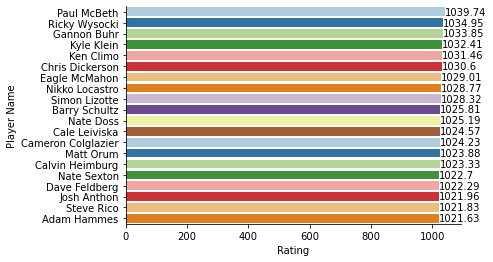

In [8]:
ax = sns.barplot(data=top_20_chart,
            x='Rating',
            y='Player Name',
            palette='Paired')
sns.despine(top=True, right=True, )

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('../assets/top-20-chart.png')

In [9]:
d = {'Player Name': ['Ricky Wysocki',
                     'Paul McBeth',
                     'Calvin Heimburg',
                     'Gannon Buhr',
                     'Chris Dickerson',
                     'Joel Freeman',
                     'Matthew Orum',
                     'Kyle Klein',
                     'Isaac Robinson',
                     'Simon Lizotte',
                     'Chris Clemons',
                     'Corey Ellis',
                     'James Conrad',
                     'Kevin Jones',
                     'Anthony Barela',
                     'Aaron Gossage',
                     'Drew Gibson',
                     'Nathan Sexton',
                     'Ezra Aderhold',
                     'Mason Ford']}
dgpt_top_20 = pd.DataFrame(data=d)
dgpt_top_20

,Player Name
0,Ricky Wysocki
1,Paul McBeth
2,Calvin Heimburg
3,Gannon Buhr
4,Chris Dickerson
5,Joel Freeman
6,Matthew Orum
7,Kyle Klein
8,Isaac Robinson
9,Simon Lizotte


In [10]:
dgpt_top_20.index = dgpt_top_20.index + 1
dgpt_top_20

,Player Name
1,Ricky Wysocki
2,Paul McBeth
3,Calvin Heimburg
4,Gannon Buhr
5,Chris Dickerson
6,Joel Freeman
7,Matthew Orum
8,Kyle Klein
9,Isaac Robinson
10,Simon Lizotte


In [11]:
dgpt_top_20 =pd.merge(dgpt_top_20, top_20[['Player Name', 'Rating']], how='inner' )
dgpt_top_20

,Player Name,Rating
0,Ricky Wysocki,1034.947075
1,Paul McBeth,1039.736842
2,Calvin Heimburg,1023.330275
3,Gannon Buhr,1033.851064
4,Chris Dickerson,1030.596610
5,Joel Freeman,1018.413978
6,Kyle Klein,1032.413333
7,Isaac Robinson,1011.466667
8,Simon Lizotte,1028.319635
9,Chris Clemons,1014.931217


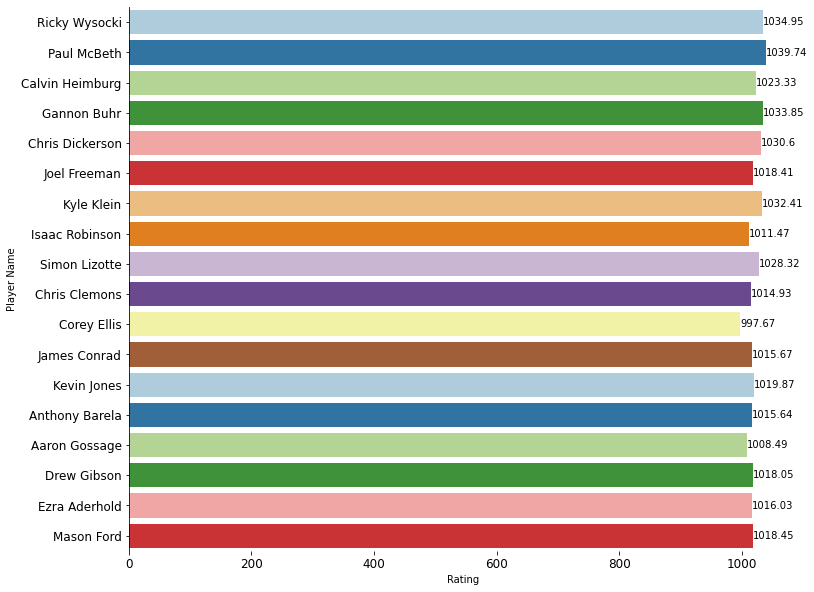

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax = sns.barplot(data=dgpt_top_20,
                 x='Rating',
                 y='Player Name',
                 palette='Paired')
sns.despine(top=True, right=True)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('../assets/dgpt-top-20-chart.jpg')

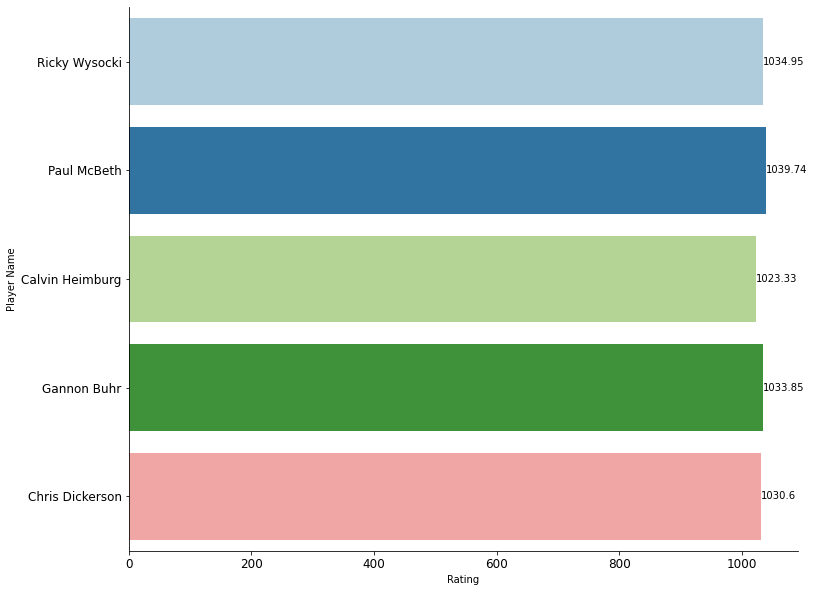

In [42]:
top_5 = dgpt_top_20.head(5)

fig, ax = plt.subplots(figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax = sns.barplot(data=top_5,
            x='Rating',
            y='Player Name',
            palette='Paired')
sns.despine(top=True, right=True, )

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('../assets/top-5-chart.jpg')

In [14]:
##convert to list to iterate through
# loop_list = dgpt_top_20.values.tolist()
# loop_list

In [15]:
# top_20_ratings = pd.DataFrame()

# for i, x in top_20.iterrows():
#     top_20['Player Name'] = top_20_ratings[i]
#     if x == loop_list[i]:
#         top_20_ratings.append(x)
    

In [16]:
tour = pd.read_csv('../data/tourney_results_comp.csv')
tour.head(2)

,Unnamed: 0,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
0,0,1,1180.0,Drew Gibson,48346,1035,-39,52.0,48.0,53.0,NaN,48.0,201,"$6,000",Las Vegas Challenge
1,1,2,1170.0,Gannon Buhr,75412,1027,-39,47.0,52.0,51.0,NaN,51.0,201,"$3,500",Las Vegas Challenge


In [17]:
tour = tour.drop('Unnamed: 0', axis=1)
tour.head(1)

,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
0,1,1180.0,Drew Gibson,48346,1035,-39,52.0,48.0,53.0,NaN,48.0,201,"$6,000",Las Vegas Challenge


In [18]:
gannon = tour.loc[tour['Name'] == 'Gannon Buhr']
ricky = tour.loc[tour['Name'] == 'Ricky Wysocki']
paul = tour.loc[tour['Name'] == 'Paul McBeth']
calvin = tour.loc[tour['Name'] == 'Calvin Heimburg']
chris = tour.loc[tour['Name'] == 'Chris Dickerson']

In [19]:
chris

,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
14,12,1070.0,Chris Dickerson,62467,1045,-30,46.0,55.0,57.0,NaN,52.0,210,$925,Las Vegas Challenge
126,5,1160.0,Chris Dickerson,62467,1043,-16,59.0,52.0,62.0,NaN,NaN,173,"$1,520",Waco Annual Charity Open
246,8,1240.0,Chris Dickerson,62467,1043,-15,56.0,57.0,61.0,NaN,NaN,174,"$1,317",27th Annual Texas State
372,4,1160.0,Chris Dickerson,62467,1046,-23,57.0,58.0,54.0,NaN,NaN,169,"$2,500",Jonesboro Open
495,8,1100.0,Chris Dickerson,62467,1046,-1,68.0,66.0,65.0,NaN,60.0,259,"$1,375",Dynamic Discs Open
951,2,990.0,Chris Dickerson,62467,1044,-29,63.0,57.0,58.0,NaN,NaN,178,"$5,800",LWS Open at Idlewild
1062,12,1050.0,Chris Dickerson,62467,1044,-15,59.0,59.0,59.0,NaN,NaN,177,"$1,417",Discraft Great Lakes Open
1184,19,1300.0,Chris Dickerson,62467,1044,-8,64.0,63.0,67.0,NaN,60.0,254,"$1,250",Discraft Ledgestone Open
1331,16,1050.0,Chris Dickerson,62467,1044,-17,60.0,57.0,58.0,NaN,NaN,175,"$1,090",The TruBank Des Moines Challenge
1437,2,950.0,Chris Dickerson,62467,1043,-31,52.0,55.0,49.0,NaN,61.0,217,"$5,750",Discraft's Green Mountain Championship


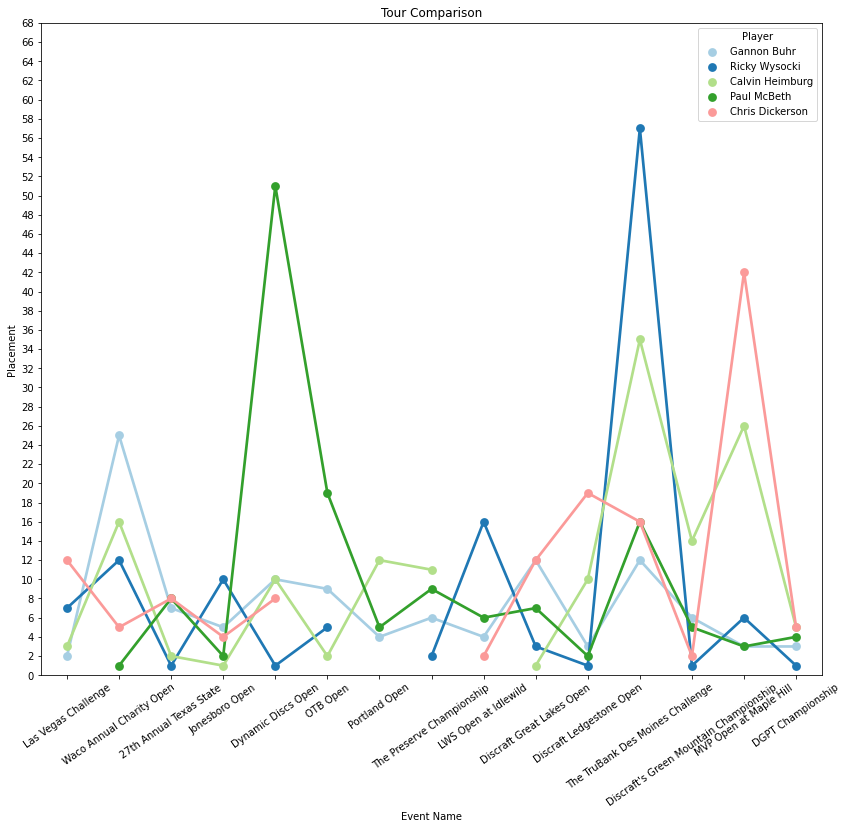

In [20]:
gan = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "Portland Open",
                         "The Preserve Championship",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                    'y':[2,25,7,5,10,9,4,6,4,12,3,12,6,3,3],})

rick = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "The Preserve Championship",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                     'y':[7,12,1,10,1,5,2,16,3,1,57,1,6,1]})

calv = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "Portland Open",
                         "The Preserve Championship",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                      'y':[3,16,2,1,10,2,12,11,1,10,35,14,26,5]})

pau = pd.DataFrame({'x':["Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "Portland Open",
                         "The Preserve Championship",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                    'y':[1,8,2,51,19,5,9,6,7,2,16,5,3,4]})

chr = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                    'y':[12,5,8,4,8,2,12,19,16,2,42,5]})

yticks = np.arange(0, 70, 2) ##sets y ticks. parameters = (start, stop, step)

gan['Player'] = 'Gannon Buhr'
rick['Player'] = 'Ricky Wysocki'
calv['Player'] = 'Calvin Heimburg'
pau['Player'] = 'Paul McBeth'
chr['Player'] = 'Chris Dickerson'
res=pd.concat([gan,rick,calv,pau,chr])
#sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14,12))
sns.pointplot(x='x', y='y', data=res, hue='Player', palette='Paired', ax=ax)
#plt.grid(axis='both')
plt.xlabel('Event Name')
plt.ylabel('Placement')
plt.ylim(0, 60)
plt.yticks(yticks)
plt.xticks(rotation = 35)
plt.title('Tour Comparison')
plt.savefig('../assets/tour-comp.png')
plt.show()

In [21]:
grid = tour.loc[(tour['Name']=='Gannon Buhr')|(tour['Name']=='Ricky Wysocki')|(tour['Name']=='Paul McBeth')|(tour['Name']=='Calvin Heimburg')|(tour['Name']=='Chris Dickerson')]
grid

,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
1,2,1170.0,Gannon Buhr,75412,1027,-39,47.0,52.0,51.0,NaN,51.0,201,"$3,500",Las Vegas Challenge
2,3,1160.0,Calvin Heimburg,45971,1047,-36,48.0,51.0,57.0,NaN,48.0,204,"$2,700",Las Vegas Challenge
8,7,1120.0,Ricky Wysocki,38008,1054,-32,48.0,55.0,51.0,NaN,54.0,208,"$1,400",Las Vegas Challenge
14,12,1070.0,Chris Dickerson,62467,1045,-30,46.0,55.0,57.0,NaN,52.0,210,$925,Las Vegas Challenge
118,1,1200.0,Paul McBeth,27523,1050,-23,55.0,54.0,57.0,NaN,NaN,166,"$7,500",Waco Annual Charity Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1,320.0,Ricky Wysocki,38008,1047,NaN,NaN,NaN,56.0,57.0,NaN,NaN,"$35,000",DGPT Championship
1614,3,300.0,Gannon Buhr,75412,1043,NaN,NaN,NaN,57.0,58.0,NaN,NaN,"$14,000",DGPT Championship
1615,4,290.0,Paul McBeth,27523,1049,NaN,NaN,NaN,55.0,63.0,NaN,NaN,"$9,000",DGPT Championship
1619,5,280.0,Calvin Heimburg,45971,1041,NaN,NaN,NaN,59.0,NaN,NaN,NaN,"$5,500",DGPT Championship


In [22]:
avg_place = grid.groupby('Name', as_index=False)['Place'].mean()
avg_place

,Name,Place
0,Calvin Heimburg,10.571429
1,Chris Dickerson,11.250000
2,Gannon Buhr,7.400000
3,Paul McBeth,9.857143
4,Ricky Wysocki,8.785714


In [23]:
avg_place['Place'] = round(avg_place['Place'], 2)
avg_place

,Name,Place
0,Calvin Heimburg,10.57
1,Chris Dickerson,11.25
2,Gannon Buhr,7.40
3,Paul McBeth,9.86
4,Ricky Wysocki,8.79


In [24]:
podiums = grid.sort_values(by='Place', ascending=True)
podiums = podiums.head(22)
podiums = podiums['Name'].value_counts()
podiums = pd.DataFrame(podiums)
podiums.reset_index(inplace=True)
podiums

,index,Name
0,Ricky Wysocki,7
1,Calvin Heimburg,5
2,Paul McBeth,4
3,Gannon Buhr,4
4,Chris Dickerson,2


In [25]:
podiums.rename(columns = {'index':'Player', 'Name':'Podium Finishes'}, inplace = True)
podiums

,Player,Podium Finishes
0,Ricky Wysocki,7
1,Calvin Heimburg,5
2,Paul McBeth,4
3,Gannon Buhr,4
4,Chris Dickerson,2


In [26]:
top10 = grid.sort_values(by='Place', ascending=True)
top10 = top10.head(49)
top10 = top10['Name'].value_counts()
top10 = pd.DataFrame(top10)
top10.reset_index(inplace=True)
top10.rename(columns = {'index':'Player', 'Name':'Top 10 Finishes'}, inplace = True)
top10

,Player,Top 10 Finishes
0,Gannon Buhr,12
1,Paul McBeth,11
2,Ricky Wysocki,11
3,Calvin Heimburg,8
4,Chris Dickerson,7


In [27]:
wins = grid.sort_values(by='Place', ascending=True)
wins = wins.head(8)
wins = wins['Name'].value_counts()
wins = pd.DataFrame(wins)
wins.reset_index(inplace=True)
wins.rename(columns = {'index':'Player', 'Name':'Wins'}, inplace = True)
wins

,Player,Wins
0,Ricky Wysocki,5
1,Calvin Heimburg,2
2,Paul McBeth,1


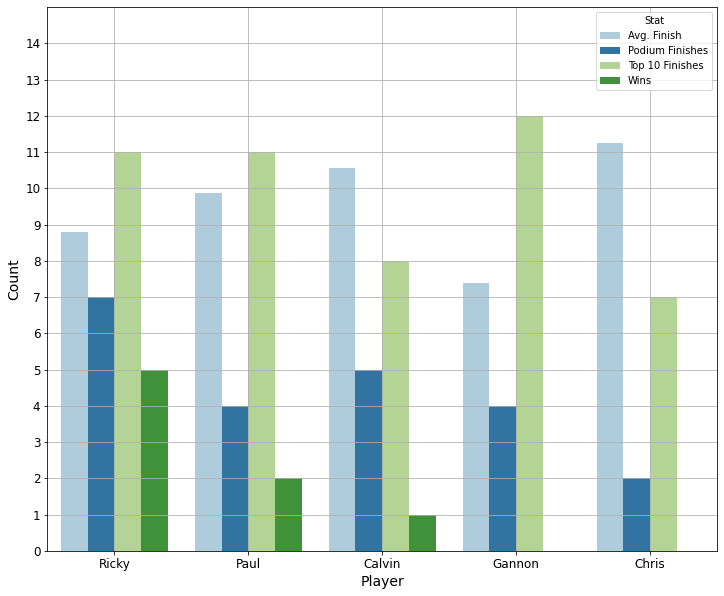

In [48]:
avg = pd.DataFrame({'x':['Ricky', 'Paul', 'Calvin', 'Gannon', 'Chris'],
                    'y':[8.79, 9.86, 10.57, 7.40, 11.25]})

pod = pd.DataFrame({'x':['Ricky', 'Paul', 'Calvin', 'Gannon', 'Chris'],
                        'y':[7, 4, 5, 4, 2]})

t10 = pd.DataFrame({'x':['Ricky', 'Paul', 'Calvin', 'Gannon', 'Chris'],
                        'y':[11, 11, 8, 12, 7]})

w = pd.DataFrame({'x':['Ricky', 'Paul', 'Calvin', 'Gannon', 'Chris'],
                        'y':[5, 2, 1, 0, 0]})

yticks = np.arange(0, 15, 1) ##sets y ticks. parameters = (start, stop, step)

avg['Stat'] = 'Avg. Finish'
pod['Stat'] = 'Podium Finishes'
t10['Stat'] = 'Top 10 Finishes'
w['Stat'] = 'Wins'
res=pd.concat([avg,pod,t10,w])
#sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='x', y='y', data=res, hue='Stat', palette='Paired', ax=ax)
plt.grid(axis='both')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, 15)
plt.yticks(yticks, fontsize=12)
plt.xticks(fontsize=12)
#plt.title('Tour Stats', fontsize=16)
plt.savefig('../assets/tour-stats.jpg')
plt.show()

In [29]:
rating_year = player_prof[['Player Name', 'EventRating', 'Year']]
rating_year.columns = ['Name', 'Rating', 'Year']
rating_year

,Name,Rating,Year
0,Ezra Aderhold,1029.0,2022
1,Ezra Aderhold,1028.0,2022
2,Ezra Aderhold,1005.0,2022
3,Ezra Aderhold,1033.0,2022
4,Ezra Aderhold,1026.0,2022
...,...,...,...
26377,Ricky Wysocki,967.0,2009
26378,Ricky Wysocki,965.0,2009
26379,Ricky Wysocki,970.0,2009
26380,Ricky Wysocki,991.0,2009


In [30]:
rating_year = rating_year.loc[(rating_year['Name']=='Gannon Buhr')|(rating_year['Name']=='Ricky Wysocki')|(rating_year['Name']=='Paul McBeth')|(rating_year['Name']=='Calvin Heimburg')|(rating_year['Name']=='Chris Dickerson')]
rating_year

,Name,Rating,Year
2910,Gannon Buhr,1044.0,2022
2911,Gannon Buhr,1067.0,2022
2912,Gannon Buhr,1052.0,2022
2913,Gannon Buhr,1049.0,2022
2914,Gannon Buhr,1039.0,2022
...,...,...,...
26377,Ricky Wysocki,967.0,2009
26378,Ricky Wysocki,965.0,2009
26379,Ricky Wysocki,970.0,2009
26380,Ricky Wysocki,991.0,2009


In [31]:
rating_year.info

<bound method DataFrame.info of                 Name  Rating  Year
2910     Gannon Buhr  1044.0  2022
2911     Gannon Buhr  1067.0  2022
2912     Gannon Buhr  1052.0  2022
2913     Gannon Buhr  1049.0  2022
2914     Gannon Buhr  1039.0  2022
...              ...     ...   ...
26377  Ricky Wysocki   967.0  2009
26378  Ricky Wysocki   965.0  2009
26379  Ricky Wysocki   970.0  2009
26380  Ricky Wysocki   991.0  2009
26381  Ricky Wysocki   958.0  2009

[1317 rows x 3 columns]>

In [32]:
r_year = rating_year.groupby(['Name', 'Year']).agg({'Rating': ['mean']})
r_year

Rating
                             mean
Name            Year             
Calvin Heimburg 2012   961.000000
                2013   987.666667
                2014   998.769231
                2015  1009.250000
                2016  1014.304348
                2017  1014.833333
                2018  1033.400000
                2019  1038.034483
                2020  1049.153846
                2021  1042.500000
                2022  1043.608696
Chris Dickerson 2014   989.200000
                2015  1006.789474
                2016  1021.685714
                2017  1032.195122
                2018  1035.510638
                2019  1038.930233
                2020  1045.933333
                2021  1041.931034
                2022  1039.090909
Gannon Buhr     2019  1016.666667
                2020  1007.000000
                2021  1032.714286
                2022  1041.920000
Paul McBeth     2006   966.000000
                2007   998.875000
                2008  1015.964286
                2009  1019.120000
                2010  1028.461538
                2011  1032.931034
                2012  1036.235294
                2013  1045.451613
                2014  1044.500000
                2015  1051.782609
                2016  1046.941176
                2017  1051.047619
                2018  1048.260870
                2019  1054.818182
                2020  1052.000000
                2021  1049.750000
                2022  1047.280000
Ricky Wysocki   2009   979.076923
                2010   999.121212
                2011  1017.976190
                2012  1039.333333
                2013  1043.750000
                2014  1040.764706
                2015  1042.714286
                2016  1046.619048
                2017  1048.250000
                2018  1043.913043
                2019  1046.750000
                2020  1047.866667
                2021  1052.391304
                2022  1045.789474

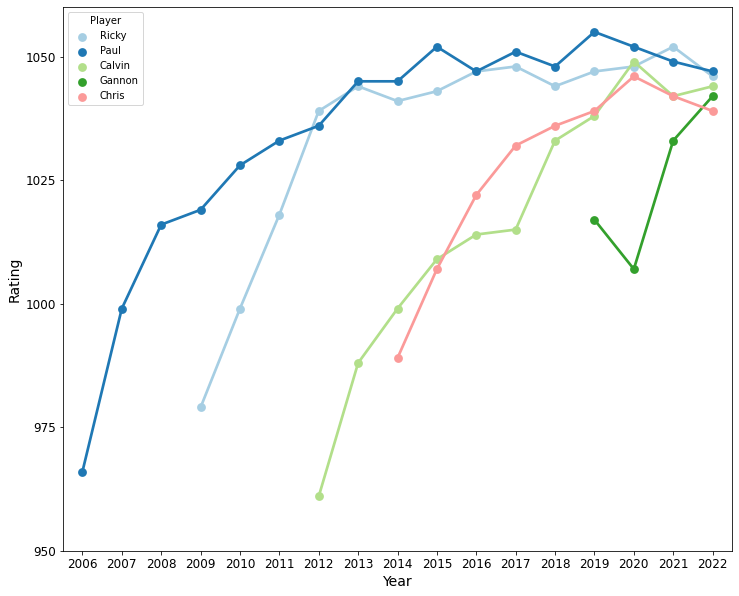

In [53]:
ricky = pd.DataFrame({'x':[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                      'y':[979, 999, 1018, 1039, 1044, 1041, 1043, 1047, 1048, 1044, 1047, 1048, 1052, 1046]})

paul = pd.DataFrame({'x':[2006, 2007, 2008, 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                     'y':[966, 999, 1016, 1019, 1028, 1033, 1036, 1045, 1045, 1052, 1047, 1051, 1048, 1055, 1052, 1049, 1047]})

calvin = pd.DataFrame({'x':[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                       'y':[961, 988, 999, 1009, 1014, 1015, 1033, 1038, 1049, 1042, 1044]})

gannon = pd.DataFrame({'x':[2019,2020,2021,2022],
                       'y':[1017, 1007, 1033, 1042]})

chris = pd.DataFrame({'x':[2014,2015,2016,2017,2018,2019,2020,2021,2022],
                      'y':[989, 1007, 1022, 1032, 1036, 1039, 1046, 1042, 1039]})

yticks = np.arange(950, 1070, 25) ##sets y ticks. parameters = (start, stop, step)


ricky['Player'] = 'Ricky'
paul['Player'] = 'Paul'
calvin['Player'] = 'Calvin'
gannon['Player'] = 'Gannon'
chris['Player'] = 'Chris'
res=pd.concat([ricky,paul,calvin,gannon,chris])
#sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
sns.pointplot(x='x', y='y', data=res, hue='Player', palette='Paired', ax=ax)
#plt.grid(axis='both')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.ylim(950, 1060)
plt.yticks(yticks, fontsize=12)
plt.xticks(fontsize=12)
#plt.title('Avg Rating by Year')
plt.savefig('../assets/rating-chart.jpg')
plt.show()

In [56]:
player_prof

,Unnamed: 0,Event Name,Month,Year,EventRating,Place,Strokes,Cash,State,Country,Division,Tier,Tour,Event Date,Player Name
0,0,(DGPT Silver) The New World Championship prese...,Nov,2022,1029.0,6,181,900.0,Florida,USA,MPO,A,DGPT-Silver,2022-11-11,Ezra Aderhold
1,1,Knowledge Management presents the Lake Marshal...,Oct,2022,1028.0,6,199,1000.0,Virginia,USA,MPO,A,DGPT-Silver,2022-10-28,Ezra Aderhold
2,2,Disc Golf Pro Tour Championship presented by B...,Oct,2022,1005.0,13,0,3500.0,North Carolina,USA,MPO,NT,DGPT-C,2022-10-13,Ezra Aderhold
3,3,United States Disc Golf Championship,Oct,2022,1033.0,23,244,920.0,South Carolina,USA,MPO,M,Major,2022-10-06,Ezra Aderhold
4,4,DGPT - MVP Open at Maple Hill,Sep,2022,1026.0,26,177,713.0,Massachusetts,USA,MPO,NT,DGPT-P,2022-09-22,Ezra Aderhold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26377,365,Rollin' the Deis,Sep,2009,967.0,3,131,0.0,Ohio,USA,MPO,C,NaN,2009-09-13,Ricky Wysocki
26378,366,King of the Courses,Sep,2009,965.0,5,199,0.0,Ohio,USA,MPO,C,NaN,2009-09-12,Ricky Wysocki
26379,367,Andrew's Pastries Open,Sep,2009,970.0,3,103,0.0,Ohio,USA,MPO,B,NaN,2009-09-05,Ricky Wysocki
26380,371,Roscoe's Revenge Presented by iCandi Graphics ...,Jul,2009,991.0,16,165,0.0,Ohio,USA,MPO,A,NaN,2009-07-04,Ricky Wysocki


In [72]:
dgpt_place = player_prof.loc[(player_prof['Tour'] == 'DGPT')]
dgpt_place = dgpt_place.loc[(player_prof['Player Name']=='Gannon Buhr') | (player_prof['Player Name']=='Ricky Wysocki') | (player_prof['Player Name']=='Paul McBeth') | (player_prof['Player Name']=='Calvin Heimburg') | (player_prof['Player Name']=='Chris Dickerson')]
dgpt_place

,Unnamed: 0,Event Name,Month,Year,EventRating,Place,Strokes,Cash,State,Country,Division,Tier,Tour,Event Date,Player Name
2916,6,DGPT - The TruBank Des Moines Challenge presen...,Aug,2022,1035.0,12,174,1325.0,Iowa,USA,MPO,NT,DGPT,2022-08-19,Gannon Buhr
2917,7,DGPT - Discraft Ledgestone Open,Aug,2022,1049.0,3,241,5425.0,Illinois,USA,MPO,NT,DGPT,2022-08-11,Gannon Buhr
2919,9,DGPT - Discraft's Great Lakes Open,Jul,2022,1033.0,12,177,1417.0,Michigan,USA,MPO,NT,DGPT,2022-07-29,Gannon Buhr
2921,11,DGPT - LWS Open at Idlewild presented by Dynam...,Jul,2022,1040.0,4,186,3200.0,Kentucky,USA,MPO,NT,DGPT,2022-07-08,Gannon Buhr
2922,12,DGPT - The Preserve Championship designed by L...,Jun,2022,1043.0,6,173,1700.0,Minnesota,USA,MPO,NT,DGPT,2022-06-24,Gannon Buhr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26147,133,Discraft Presents The Green Mountain Champions...,Sep,2016,1063.0,1,151,3250.0,Vermont,USA,MPO,A,DGPT,2016-09-15,Ricky Wysocki
26150,136,Ledgestone Insurance Open presented by Discraft,Aug,2016,1025.0,12,225,1438.0,Illinois,USA,MPO,A,DGPT,2016-08-18,Ricky Wysocki
26152,138,The Majestic,Jul,2016,1051.0,1,183,2200.0,Minnesota,USA,MPO,A,DGPT,2016-07-29,Ricky Wysocki
26155,141,Legacy Discs Silver Cup XVI Pro Tour presented...,Jul,2016,1039.0,1,210,3030.0,Wisconsin,USA,MPO,A,DGPT,2016-07-08,Ricky Wysocki


In [74]:
dgpt_place.drop(['Unnamed: 0'], axis=1, inplace=True)
dgpt_place

,Event Name,Month,Year,EventRating,Place,Strokes,Cash,State,Country,Division,Tier,Tour,Event Date,Player Name
2916,DGPT - The TruBank Des Moines Challenge presen...,Aug,2022,1035.0,12,174,1325.0,Iowa,USA,MPO,NT,DGPT,2022-08-19,Gannon Buhr
2917,DGPT - Discraft Ledgestone Open,Aug,2022,1049.0,3,241,5425.0,Illinois,USA,MPO,NT,DGPT,2022-08-11,Gannon Buhr
2919,DGPT - Discraft's Great Lakes Open,Jul,2022,1033.0,12,177,1417.0,Michigan,USA,MPO,NT,DGPT,2022-07-29,Gannon Buhr
2921,DGPT - LWS Open at Idlewild presented by Dynam...,Jul,2022,1040.0,4,186,3200.0,Kentucky,USA,MPO,NT,DGPT,2022-07-08,Gannon Buhr
2922,DGPT - The Preserve Championship designed by L...,Jun,2022,1043.0,6,173,1700.0,Minnesota,USA,MPO,NT,DGPT,2022-06-24,Gannon Buhr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26147,Discraft Presents The Green Mountain Champions...,Sep,2016,1063.0,1,151,3250.0,Vermont,USA,MPO,A,DGPT,2016-09-15,Ricky Wysocki
26150,Ledgestone Insurance Open presented by Discraft,Aug,2016,1025.0,12,225,1438.0,Illinois,USA,MPO,A,DGPT,2016-08-18,Ricky Wysocki
26152,The Majestic,Jul,2016,1051.0,1,183,2200.0,Minnesota,USA,MPO,A,DGPT,2016-07-29,Ricky Wysocki
26155,Legacy Discs Silver Cup XVI Pro Tour presented...,Jul,2016,1039.0,1,210,3030.0,Wisconsin,USA,MPO,A,DGPT,2016-07-08,Ricky Wysocki


In [75]:
dgpt_place = dgpt_place.groupby(['Player Name', 'Year']).agg({'Place': ['mean']})
dgpt_place

Place
                           mean
Player Name     Year           
Calvin Heimburg 2017  33.000000
                2018   7.000000
                2019  17.200000
                2020   4.800000
                2021   4.833333
                2022   9.363636
Chris Dickerson 2016  20.000000
                2017  10.250000
                2018   9.000000
                2019  13.250000
                2020   5.285714
                2021   9.285714
                2022   9.555556
Gannon Buhr     2020  39.000000
                2021  21.250000
                2022   8.250000
Paul McBeth     2016   7.250000
                2017   1.600000
                2018   4.666667
                2019   1.500000
                2020   3.111111
                2021   6.583333
                2022  11.454545
Ricky Wysocki   2016   3.800000
                2017   2.250000
                2018   5.428571
                2019   4.750000
                2020  10.888889
                2021   4.000000
                2022  10.454545

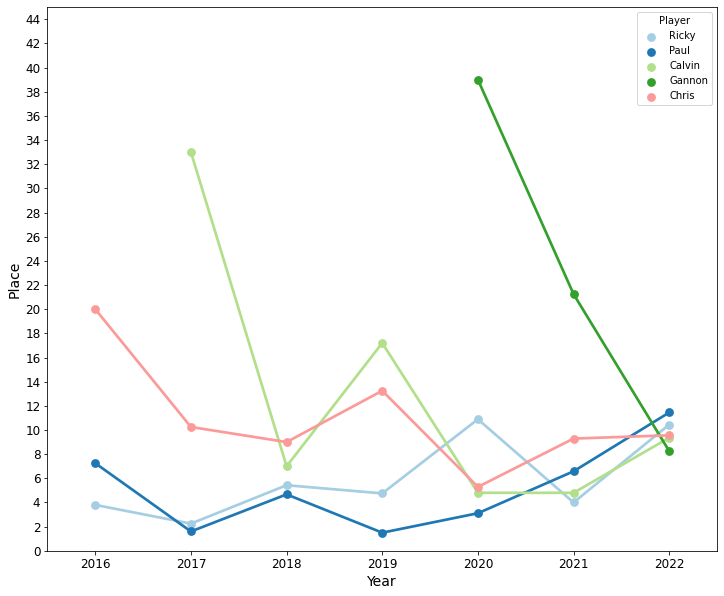

In [77]:
ricky = pd.DataFrame({'x':[2016, 2017, 2018, 2019, 2020, 2021, 2022],
                      'y':[3.8, 2.25, 5.43, 4.75, 10.89, 4, 10.45]})

paul = pd.DataFrame({'x':[2016, 2017, 2018, 2019, 2020, 2021, 2022],
                     'y':[7.25, 1.6, 4.67, 1.5, 3.11, 6.58, 11.45]})

calvin = pd.DataFrame({'x':[2017, 2018, 2019, 2020, 2021, 2022],
                       'y':[33, 7, 17.2, 4.8, 4.8, 9.36]})

gannon = pd.DataFrame({'x':[2020,2021,2022],
                       'y':[39, 21.25, 8.25]})

chris = pd.DataFrame({'x':[2016, 2017, 2018, 2019, 2020, 2021, 2022],
                      'y':[20, 10.25, 9, 13.25, 5.29, 9.29, 9.56]})

yticks = np.arange(0, 45, 2) ##sets y ticks. parameters = (start, stop, step)


ricky['Player'] = 'Ricky'
paul['Player'] = 'Paul'
calvin['Player'] = 'Calvin'
gannon['Player'] = 'Gannon'
chris['Player'] = 'Chris'
res=pd.concat([ricky,paul,calvin,gannon,chris])
#sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
sns.pointplot(x='x', y='y', data=res, hue='Player', palette='Paired', ax=ax)
#plt.grid(axis='both')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Place', fontsize=14)
plt.ylim(0, 45)
plt.yticks(yticks, fontsize=12)
plt.xticks(fontsize=12)
#plt.title('Avg Rating by Year')
plt.savefig('../assets/dgpt-place-year.jpg')
plt.show()

In [79]:
mpo_place = player_prof.loc[(player_prof['Division'] == 'MPO')]
mpo_place = mpo_place.loc[(player_prof['Player Name']=='Gannon Buhr') | (player_prof['Player Name']=='Ricky Wysocki') | (player_prof['Player Name']=='Paul McBeth') | (player_prof['Player Name']=='Calvin Heimburg') | (player_prof['Player Name']=='Chris Dickerson')]
mpo_place.drop(['Unnamed: 0'], axis=1, inplace=True)
mpo_place

,Event Name,Month,Year,EventRating,Place,Strokes,Cash,State,Country,Division,Tier,Tour,Event Date,Player Name
2910,Disc Golf Pro Tour Championship presented by B...,Oct,2022,1044.0,3,0,14000.0,North Carolina,USA,MPO,NT,DGPT-C,2022-10-13,Gannon Buhr
2911,United States Disc Golf Championship,Oct,2022,1067.0,1,223,25000.0,South Carolina,USA,MPO,M,Major,2022-10-06,Gannon Buhr
2912,DGPT - MVP Open at Maple Hill,Sep,2022,1052.0,3,166,4625.0,Massachusetts,USA,MPO,NT,DGPT-P,2022-09-22,Gannon Buhr
2913,DGPT Playoffs - Discraft's Green Mountain Cham...,Sep,2022,1049.0,6,219,2050.0,Vermont,USA,MPO,NT,DGPT-P,2022-09-15,Gannon Buhr
2914,2022 PDGA Professional Disc Golf World Champio...,Aug,2022,1039.0,14,296,1960.0,Kansas,USA,MPO,M,Major,2022-08-30,Gannon Buhr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26377,Rollin' the Deis,Sep,2009,967.0,3,131,0.0,Ohio,USA,MPO,C,NaN,2009-09-13,Ricky Wysocki
26378,King of the Courses,Sep,2009,965.0,5,199,0.0,Ohio,USA,MPO,C,NaN,2009-09-12,Ricky Wysocki
26379,Andrew's Pastries Open,Sep,2009,970.0,3,103,0.0,Ohio,USA,MPO,B,NaN,2009-09-05,Ricky Wysocki
26380,Roscoe's Revenge Presented by iCandi Graphics ...,Jul,2009,991.0,16,165,0.0,Ohio,USA,MPO,A,NaN,2009-07-04,Ricky Wysocki


In [81]:
mpo_place = mpo_place.groupby(['Player Name', 'Year']).agg({'Place': ['mean']})
mpo_place

Place
                           mean
Player Name     Year           
Calvin Heimburg 2012   8.500000
                2013   9.300000
                2014   4.730769
                2015   6.100000
                2016   2.652174
                2017   8.250000
                2018   6.480000
                2019   9.166667
                2020   4.714286
                2021   7.520000
                2022  10.043478
Chris Dickerson 2014   5.100000
                2015   4.552632
                2016   4.416667
                2017   3.627907
                2018   3.020833
                2019   2.750000
                2020   2.322581
                2021   5.705882
                2022   8.227273
Gannon Buhr     2019   1.333333
                2020  11.400000
                2021  17.941176
                2022   7.115385
Paul McBeth     2006  35.000000
                2007  12.000000
                2008   6.500000
                2009   7.640000
                2010   3.923077
                2011   5.758621
                2012   3.852941
                2013   2.387097
                2014   1.875000
                2015   1.304348
                2016   3.789474
                2017   1.826087
                2018   3.958333
                2019   4.863636
                2020   2.928571
                2021   5.000000
                2022   7.240000
Ricky Wysocki   2009   5.076923
                2010   8.424242
                2011   6.142857
                2012   3.461538
                2013   3.656250
                2014   3.617647
                2015   5.666667
                2016   2.391304
                2017   2.111111
                2018   4.125000
                2019   3.750000
                2020   7.062500
                2021   4.200000
                2022   8.263158

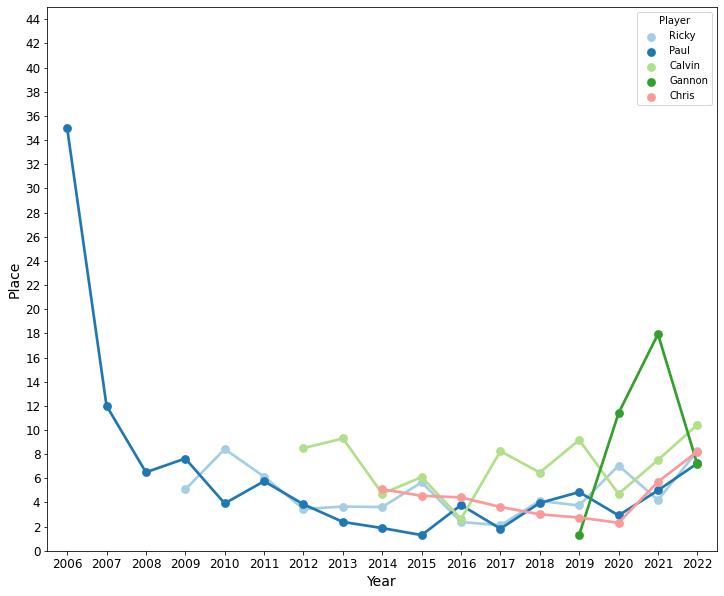

In [82]:
ricky = pd.DataFrame({'x':[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
                      'y':[5.08, 8.42, 6.14, 3.46, 3.66, 3.62, 5.67, 2.39, 2.11, 4.13, 3.75, 7.06, 4.20, 8.26]})

paul = pd.DataFrame({'x':[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
                     'y':[35, 12, 6.5, 7.64, 3.92, 5.76, 3.85, 2.39, 1.88, 1.30, 3.79, 1.83, 3.96, 4.86, 2.93, 5, 7.24]})

calvin = pd.DataFrame({'x':[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
                       'y':[8.5, 9.3, 4.73, 6.1, 2.65, 8.25, 6.48, 9.17, 4.71, 7.52, 10.43]})

gannon = pd.DataFrame({'x':[2019, 2020,2021,2022],
                       'y':[1.33, 11.4, 17.94, 7.15]})

chris = pd.DataFrame({'x':[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
                      'y':[5.1, 4.55, 4.42, 3.63, 3.02, 2.75, 2.32, 5.71, 8.22]})

yticks = np.arange(0, 45, 2) ##sets y ticks. parameters = (start, stop, step)


ricky['Player'] = 'Ricky'
paul['Player'] = 'Paul'
calvin['Player'] = 'Calvin'
gannon['Player'] = 'Gannon'
chris['Player'] = 'Chris'
res=pd.concat([ricky,paul,calvin,gannon,chris])
#sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
sns.pointplot(x='x', y='y', data=res, hue='Player', palette='Paired', ax=ax)
#plt.grid(axis='both')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Place', fontsize=14)
plt.ylim(0, 45)
plt.yticks(yticks, fontsize=12)
plt.xticks(fontsize=12)
#plt.title('Avg Rating by Year')
#plt.savefig('../assets/dgpt-place-year.jpg')
plt.show()